# Chapter 6 - exercise 1: Trực quan hóa dữ liệu Chipotle

## Cho dữ liệu 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
### Hãy thực hiện các yêu cầu sau:
1. Đọc dữ liệu và gán vào cho biến chipo. hiển thi 10 dòng đầu của dữ liệu
2. Tạo biến x chứa các item_name, in head của x. Sử dụng collections.Counter(x) để tạo một dictionary với key là item_name và value là tần suất xuất hiện của item_name, gán cho biến letter_counts. In letter_counts
3. Chuyển letter_counts thành DataFrame và đặt tên là df
4. Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên. Vẽ biểu đồ khối với 5 item này có title xlabel, ylabel và xsticks
5. Cập nhật lại cột item_price với đơn giá là số thực. Nhóm các đơn hàng theo order_id. Tính tổng giá trị của mỗi đơn hàng => gán vào biến orders. In head của orders
6. Vẽ scatterplot của orders với x là orders.item_price và y là orders.quantityc có title xlabel, ylabel

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# set this so the 
%matplotlib inline

In [2]:
# Câu 1
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chipo = pd.read_csv(url, sep = '\t')

In [3]:
print(chipo.shape)
chipo.head(10)

(4622, 5)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
# Câu 2
# Tạo biến x chứa các item_name, in head của x
x = chipo.item_name
print(x.head())

# Sử dụng collections.Counter(x) để tạo một dictionary với key là item_name và value là tần suất xuất hiện của item_name
letter_counts = collections.Counter(x)
print(letter_counts)

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object
Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar'

In [5]:
# Câu 3: 
# Chuyển letter_counts thành DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')
print(df.head())

                                         0
Chips and Fresh Tomato Salsa           110
Izze                                    20
Nantucket Nectar                        27
Chips and Tomatillo-Green Chili Salsa   31
Chicken Bowl                           726


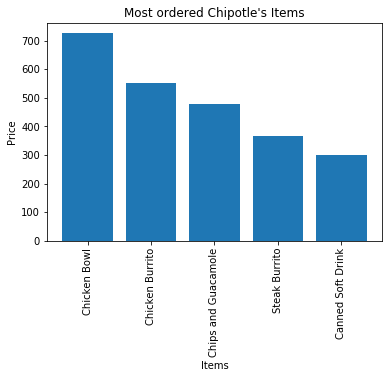

In [6]:
# Câu 4:
# Sắp xếp tần suất giảm dần, và lấy 5 item đầu tiên
# Vẽ biểu đồ khối với 5 item này có title xlabel, ylabel và xsticks

df_5 = df.sort_values(by = 0, ascending = False)[0:5]

# create the plot
plt.bar(df_5.index.values, df_5[0].values)

# Thiết lập title và labels, xsticks (rotation='vertical')
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')
plt.xticks(df_5.index.values, df_5.index.values, rotation='vertical')

# hiển thị biểu đồ
plt.show()

In [7]:
# Câu 5: Cập nhật lại cột item_price với đơn giá là số thực. Nhóm các đơn hàng theo order_id. 
# Tính tổng giá trị của mỗi đơn hàng => gán vào biến orders. In head của orders
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] 
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [8]:
orders = chipo.groupby('order_id').sum()
orders.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


(0, 36.7178857951459)

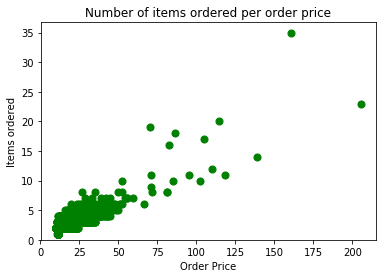

In [9]:
# Câu 6: Vẽ scatterplot của orders với x là orders.item_price và y là orders.quantity
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Thiết lập title và labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)